In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
data_train.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,80.0,50353.0,6.0,991800.0,7.0,2.0,11607.0,26.0,5840.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,49249.0,53.0,17.0,205.0,2.0,2.0,102.0,134.0,51.0,51.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,64190.0,53.0,17.0,277.0,2.0,2.0,62.0,164.0,31.0,31.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,62132.0,53.0,17.0,47196.0,1.0,1.0,48.0,240.0,48.0,48.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,48354.0,6123.0,6.0,91.0,1.0,1.0,2.0,6.0,2.0,2.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
data_test.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,37420.0,80.0,6.0,102557749.0,7.0,5.0,337.0,11595.0,325.0,0.0,...,20.0,13942.0,0.0,13942.0,13942.0,99500000.0,0.0,99500000.0,99500000.0,1
1,56354.0,80.0,6.0,97377721.0,6.0,6.0,306.0,11595.0,306.0,0.0,...,32.0,2.0,0.0,2.0,2.0,97400000.0,0.0,97400000.0,97400000.0,1
2,34996.0,80.0,6.0,63118414.0,7.0,0.0,0.0,0.0,0.0,0.0,...,40.0,7006686.0,0.0,7006686.0,7006686.0,18700000.0,12200000.0,32100000.0,8016141.0,1
3,123.0,123.0,17.0,21232.0,1.0,1.0,48.0,48.0,48.0,48.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,49708.0,53.0,17.0,203.0,2.0,2.0,72.0,232.0,36.0,36.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


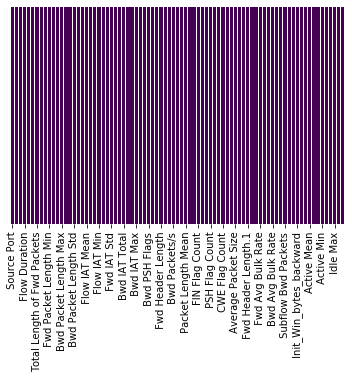

In [5]:
import seaborn as sns

# replacing na with null value
data_train.replace('na',np.nan,inplace=True)
sns.heatmap(data_train.isna(),yticklabels=False,cbar=False,cmap='viridis')

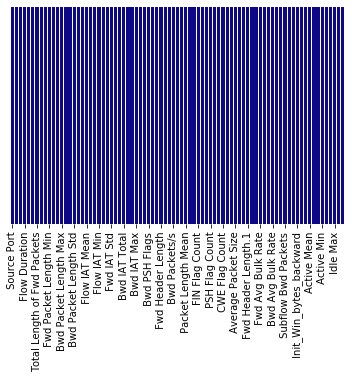

In [6]:
# replacing na with null value
data_test.replace('na',np.nan,inplace=True)
sns.heatmap(data_test.isna(),yticklabels=False,cbar=False,cmap='plasma')

In [7]:
# filling the missing value of traning dataset 

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan,strategy='mean',axis=0)
for column in data_train:
    data_train [[column]]= imputer.fit_transform(data_train [[column]])
    

C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
#filling the missing value in testing dataset
imputer1 = Imputer(missing_values=np.nan,strategy='mean',axis=0)
for column in data_test:
    data_test [[column]]= imputer1.fit_transform(data_test [[column]])

C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

# Scaling the tranning dataset
scaler=StandardScaler()
scaler.fit(data_train)
X_scaled_train=pd.DataFrame(scaler.transform(data_train.astype(np.int64)))

# Scaling the testing dataset
scaler1=StandardScaler()
scaler1.fit(data_train)
X_scaled_test=pd.DataFrame(scaler.transform(data_test.astype(np.int64)))

C:\Users\Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [10]:
X=data_train.iloc[:,:-1].values
y=data_train.iloc[:,-1].values

In [11]:
# applying train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [12]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print("Accuracy score",accuracy_score(y_pred,y_test))


Accuracy score 0.9990145077385376


In [13]:
#logistic regression
lr=LogisticRegression(C=10,random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Accuracy score",accuracy_score(y_pred,y_test))

C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score 0.7959788684610165


C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
# KNearest Neighbours
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy score',accuracy_score(y_pred,y_test))

Accuracy score 0.986857410578694


In [15]:
#Fitting to a best model
forest=RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print("Accuracy score",accuracy_score(y_pred,y_test))
# confusion matrix
print('confusion metrics',confusion_matrix(y_test,y_pred))

Accuracy score 0.9990145077385376
confusion metrics [[68169    75]
 [   47 55505]]


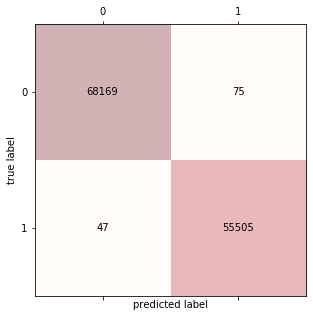

classification report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68244
         1.0       1.00      1.00      1.00     55552

   micro avg       1.00      1.00      1.00    123796
   macro avg       1.00      1.00      1.00    123796
weighted avg       1.00      1.00      1.00    123796



In [16]:
#ploting

confmat=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
     ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print('classification report\n',classification_report(y_test,y_pred))

In [17]:
#Checking for testing data
data_test.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
count,618976.000000,618976.000000,618976.000000,6.189760e+05,618976.000000,618976.000000,6.189760e+05,6.189760e+05,618976.000000,618976.000000,...,6.189760e+05,6.189760e+05,6.189760e+05,6.189760e+05,6.189760e+05,6.189760e+05,6.189760e+05,6.189760e+05,6.189760e+05,618976.000000
mean,42940.957237,6343.647261,8.656950,1.940955e+07,7.477030,7.881718,4.411792e+02,1.197072e+04,178.851371,13.440492,...,-3.713945e+03,8.837276e+04,3.428623e+04,1.418387e+05,6.800316e+04,1.421407e+07,8.256868e+05,1.484169e+07,1.359891e+07,0.449578
std,19589.789218,16034.968437,4.712813,3.723038e+07,595.133544,800.998245,7.861587e+03,1.767785e+06,608.678854,55.103577,...,1.373081e+06,6.365215e+05,3.791334e+05,9.416880e+05,5.717817e+05,3.132671e+07,6.108292e+06,3.218228e+07,3.109521e+07,0.497452
min,0.000000,0.000000,0.000000,-2.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,36074.000000,53.000000,6.000000,8.000000e+01,1.000000,1.000000,2.000000e+00,0.000000e+00,2.000000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,50212.000000,80.000000,6.000000,4.125250e+04,2.000000,2.000000,5.000000e+01,1.140000e+02,31.000000,0.000000,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,57334.000000,443.000000,6.000000,7.042950e+06,5.000000,5.000000,3.110000e+02,4.413000e+03,201.000000,6.000000,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.328202e+06,0.000000e+00,5.328551e+06,5.185892e+06,1.000000
max,65535.000000,65532.000000,17.000000,1.200000e+08,200755.000000,270686.000000,2.866110e+06,5.910000e+08,24820.000000,2065.000000,...,7.800000e+01,5.625134e+07,7.000000e+07,9.900000e+07,5.625134e+07,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.000000


In [18]:
data_test.replace('na',np.nan,inplace=True)

# checking null values
data_test.isnull().values.any


<function ndarray.any>

In [21]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

# Scaling the tranning dataset
scaler=StandardScaler()
scaler.fit(data_test)
X_scaled_test=pd.DataFrame(scaler.transform(data_test.astype(np.int64)))

# Scaling the testing dataset
scaler1=StandardScaler()
scaler1.fit(data_test)
X_scaled_test=pd.DataFrame(scaler.transform(data_test.astype(np.int64)))

C:\Users\Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [22]:
X=data_train.iloc[:,:-1].values
y=data_train.iloc[:,-1].values

In [23]:
# applying train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [24]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print("Accuracy score",accuracy_score(y_pred,y_test))

Accuracy score 0.9990145077385376


In [25]:
#logistic regression
lr=LogisticRegression(C=10,random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Accuracy score",accuracy_score(y_pred,y_test))

C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score 0.7959788684610165


C:\Users\Patel\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
# KNearest Neighbours
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy score',accuracy_score(y_pred,y_test))

Accuracy score 0.986857410578694


In [27]:
#Fitting to a best model
forest=RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print("Accuracy score",accuracy_score(y_pred,y_test))
# confusion matrix
print('confusion metrics',confusion_matrix(y_test,y_pred))

Accuracy score 0.9990145077385376
confusion metrics [[68169    75]
 [   47 55505]]


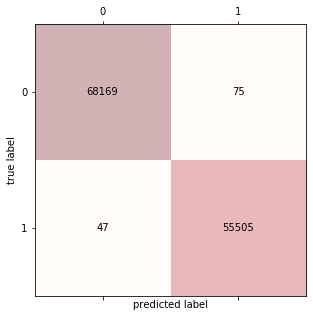

classification report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68244
         1.0       1.00      1.00      1.00     55552

   micro avg       1.00      1.00      1.00    123796
   macro avg       1.00      1.00      1.00    123796
weighted avg       1.00      1.00      1.00    123796



In [28]:
#ploting

confmat=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
     ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print('classification report\n',classification_report(y_test,y_pred))